<a href="https://colab.research.google.com/github/Chithu-k/machinelearning/blob/main/image_forgery1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Casia_database/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_sec_30351.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_pla_30210.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_cha_30340.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_cha_30315.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_ind_30082.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_arc_30235.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_ind_30050.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_sec_00068.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_arc_30651.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_arc_10103.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_nat_30214.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_arc_30831.jpg
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_pla_30327.jpg


In [4]:
import os
import sys
import os
from PIL import Image,ImageChops,ImageEnhance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2

from google.colab.patches import cv2_imshow

In [7]:
def ela_image(path, quality=90):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png' 
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    ela_image = ImageChops.difference(image, temp_image)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff 
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)  
    return ela_image

In [8]:
parent_dir =r'/content/drive/MyDrive/Casia_database' 
for i in os.listdir(parent_dir):
  path=os.path.join(parent_dir,i)
  #print(path)
  for j in os.listdir(path):
    #printj)
    path_new = os.path.join(path,j)
    for k in os.listdir(path_new):
      path_new_1 = os.path.join(path_new,k)
      print(path_new_1)
      Image.open(path_new_1)
      break




/content/drive/MyDrive/Casia_database/Tp_Test/Tp_Test/Tp_S_NRD_S_N_ind20060_ind20060_01801.tif
/content/drive/MyDrive/Casia_database/Tp_Train/Tp_Train/Tp_S_CRD_S_N_ind00047_ind00047_01337.tif
/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_ani_30498.jpg
/content/drive/MyDrive/Casia_database/Au_Test/Au_Test/Au_ind_20036.jpg


In [9]:
Real_image_path='/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_ani_00002.jpg'
Real_image_path2='/content/drive/MyDrive/Casia_database/Au_Test/Au_Test/Au_ani_00001.jpg'
Fake_image_path1='/content/drive/MyDrive/Casia_database/Tp_Train/Tp_Train/Tp_D_CND_M_N_ani00018_sec00096_00138.tif'
Fake_image_path2='/content/drive/MyDrive/Casia_database/Tp_Test/Tp_Test/Tp_D_CNN_M_N_sec10110_sec10101_10298 (1).tif'

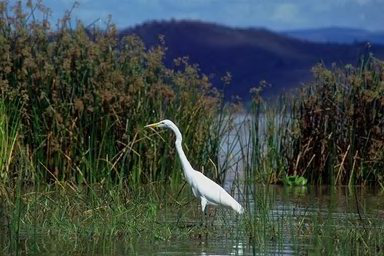

In [10]:
Image.open(Real_image_path)

In [11]:
image = Image.open('/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_ani_00002.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

JPEG
RGB
(384, 256)


In [12]:
from array import array

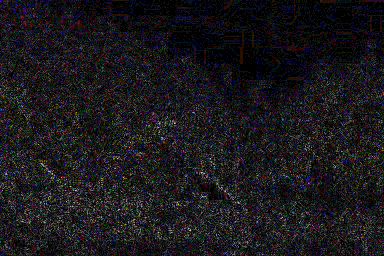

In [13]:
ela_image(Real_image_path)

In [14]:
import numpy as np
from PIL import Image
img=np.asarray(Image.open("/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_ani_00002.jpg"))
print(img)

[[[118 132 159]
  [122 136 163]
  [118 130 156]
  ...
  [ 98 132 177]
  [ 96 130 175]
  [ 95 129 174]]

 [[101 113 135]
  [103 115 137]
  [100 111 131]
  ...
  [ 96 130 175]
  [ 94 128 173]
  [ 93 127 172]]

 [[ 93 103 113]
  [ 86  96 106]
  [ 81  91 103]
  ...
  [ 90 127 171]
  [ 89 126 170]
  [ 89 126 170]]

 ...

 [[ 43  50  19]
  [ 48  55  24]
  [ 36  45  16]
  ...
  [ 78  89  59]
  [ 85  96  64]
  [ 46  57  23]]

 [[ 45  52  21]
  [ 59  66  35]
  [ 51  57  29]
  ...
  [ 67  81  48]
  [ 69  83  48]
  [ 43  57  21]]

 [[ 39  46  15]
  [ 49  56  25]
  [ 49  55  27]
  ...
  [ 70  86  50]
  [ 51  67  30]
  [ 38  54  17]]]


In [15]:
import numpy as np
from PIL import Image
img=np.asarray(Image.open("/content/drive/MyDrive/Casia_database/Au_Train/Au_Train/Au_ani_00002.jpg"))
print(img)

[[[118 132 159]
  [122 136 163]
  [118 130 156]
  ...
  [ 98 132 177]
  [ 96 130 175]
  [ 95 129 174]]

 [[101 113 135]
  [103 115 137]
  [100 111 131]
  ...
  [ 96 130 175]
  [ 94 128 173]
  [ 93 127 172]]

 [[ 93 103 113]
  [ 86  96 106]
  [ 81  91 103]
  ...
  [ 90 127 171]
  [ 89 126 170]
  [ 89 126 170]]

 ...

 [[ 43  50  19]
  [ 48  55  24]
  [ 36  45  16]
  ...
  [ 78  89  59]
  [ 85  96  64]
  [ 46  57  23]]

 [[ 45  52  21]
  [ 59  66  35]
  [ 51  57  29]
  ...
  [ 67  81  48]
  [ 69  83  48]
  [ 43  57  21]]

 [[ 39  46  15]
  [ 49  56  25]
  [ 49  55  27]
  ...
  [ 70  86  50]
  [ 51  67  30]
  [ 38  54  17]]]


In [19]:
import numpy as np
from PIL import Image
img_ela=np.asarray(Image.open("/content/temp_ela.png.jpg"))
print(img_ela)

[[[ 36   0 127]
  [  0  18 127]
  [ 18   0  72]
  ...
  [ 54   0  54]
  [ 36  18  36]
  [ 36  18  36]]

 [[109  36  36]
  [ 18  18  91]
  [ 18   0  91]
  ...
  [ 54   0  18]
  [ 36  18   0]
  [ 36  18   0]]

 [[ 36   0  72]
  [ 18  18  91]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 18  18  18]]

 ...

 [[ 18  18  54]
  [  0   0  36]
  [ 18  54  91]
  ...
  [ 18  36  18]
  [ 18  72  18]
  [ 91  36  54]]

 [[  0   0  36]
  [ 54  54  18]
  [  0  18  36]
  ...
  [ 54  18  72]
  [  0  36   0]
  [ 36   0  54]]

 [[ 18  54  72]
  [ 36   0  18]
  [ 36  18  18]
  ...
  [  0   0   0]
  [  0   0  36]
  [ 18  18  18]]]


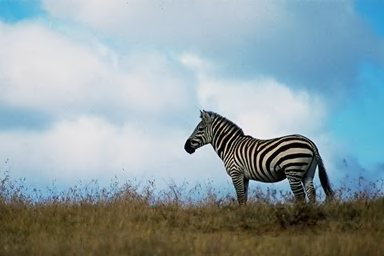

In [17]:
Image.open(Real_image_path2)

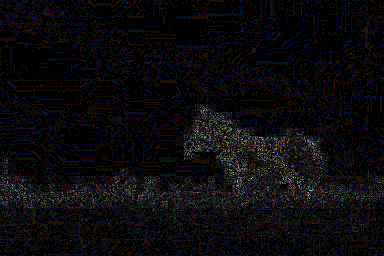

In [18]:
ela_image(Real_image_path2)

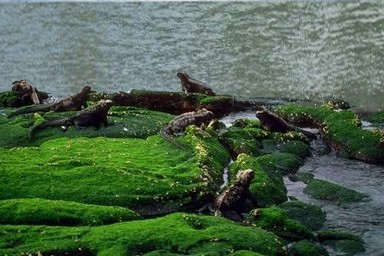

In [20]:
Image.open(Fake_image_path1)

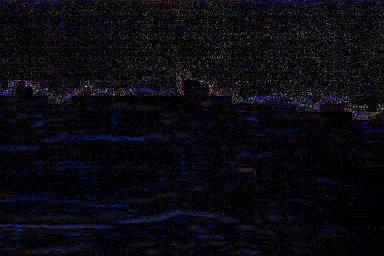

In [21]:
ela_image(Fake_image_path1)

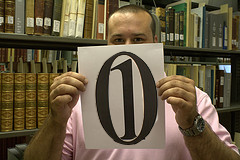

In [22]:
Image.open(Fake_image_path2)

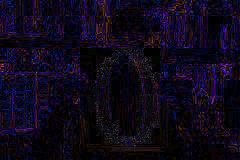

In [23]:
ela_image(Fake_image_path2)

In [26]:
image_size=(128,128)

In [24]:
def preprocessing(image_path):
    return np.array(ela_image(image_path).resize(image_size)).flatten()/255

In [25]:
X = [] # ELA converted images
Y = []

In [27]:
import random
path = '/content/drive/MyDrive/Casia_database/Au_Train'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(preprocessing(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag)


Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
2100 2100


In [28]:
path = '/content/drive/MyDrive/Casia_database/Tp_Train'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(preprocessing(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 2500 images
Processing 3000 images
Processing 3500 images
3872 3872


In [29]:
from keras.utils.np_utils import to_categorical

In [30]:
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

3097 3097
775 775


In [33]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu',input_shape=(128,128,3)))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=256,kernel_size=(5,5),activation='relu'))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(units=16,activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(units=2,activation='softmax'))
    return model

In [34]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 128)     9728      
                                                                 
 average_pooling2d (AverageP  (None, 62, 62, 128)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 256)       819456    
                                                                 
 average_pooling2d_1 (Averag  (None, 29, 29, 256)      0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 215296)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [35]:
epochs = 30
batch_size = 32
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs= 30, batch_size= 32)

Epoch 1/30
97/97 [==============================] - 759s 8s/step - loss: 0.6504 - accuracy: 0.7181 - val_loss: 0.6598 - val_accuracy: 0.7690
Epoch 2/30
97/97 [==============================] - 765s 8s/step - loss: 0.5447 - accuracy: 0.8088 - val_loss: 0.6108 - val_accuracy: 0.8361
Epoch 3/30
97/97 [==============================] - 762s 8s/step - loss: 0.5160 - accuracy: 0.8269 - val_loss: 0.5429 - val_accuracy: 0.8606
Epoch 4/30
97/97 [==============================] - 763s 8s/step - loss: 0.5025 - accuracy: 0.8350 - val_loss: 0.5262 - val_accuracy: 0.8697
Epoch 5/30
97/97 [==============================] - 762s 8s/step - loss: 0.4839 - accuracy: 0.8511 - val_loss: 0.5310 - val_accuracy: 0.8723
Epoch 6/30
97/97 [==============================] - 770s 8s/step - loss: 0.4567 - accuracy: 0.8628 - val_loss: 0.5040 - val_accuracy: 0.8181
Epoch 7/30
97/97 [==============================] - 766s 8s/step - loss: 0.4383 - accuracy: 0.8679 - val_loss: 0.3446 - val_accuracy: 0.9110
Epoch 8/30
97

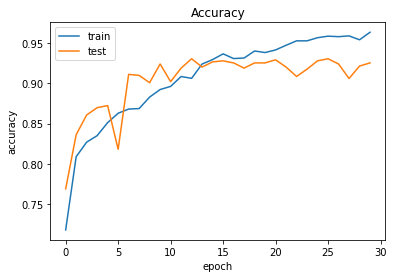

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

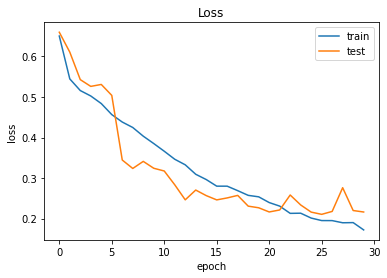

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [39]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)



    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [41]:
Y_pred = build_model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

AttributeError: ignored